### Part VI: Chapters 17, 18, 19 

#### Chapter 17: Introduction to Multivariate Statistics

- Expected Value and Mean:

    Expected Value:   $ E[X] = \sum{x_1 \times p1, x_2 \times p_2, ... , x_n \times p_n} $
    
    Mean: $\mu = \frac{1}{n} \times \sum{x_1,x_2,...,x_n} $
    
    $ \bar{x} = \frac{1}{n} \times \sum_{i=1}^n{xi}$
    
- Variance and Standard Deviation:

    Variance: $Var[X] = E[(X - E[X])^2] = \sum p(x_1) \times (x_1 - E[X])^2, p(x_2) \times (x_2 - E[X])^2, ... , p(x_n) \times (x_n - E[X])^2$
    
    Sample variance: $ \sigma^2 = \frac{1}{n-1} \times \sum_{i=1}^{n} (x_i - \mu)^2 $
    
    Standard deviation: $ s = \sqrt{\sigma^2} $
    
- Covariance and Correlation:

    Covariance: $ cov(X,Y) = E[(X - E[X]) \times (Y - E[Y])] = \frac{1}{n} \times \sum (x - E[X]) \times (y - E[Y])]$
    
    Correlation: $ r = \frac{cov(X,Y)}{s_X \times s_Y} $
    
- Covariance Matrix: square and symmetric matrix that describes the covariance between two or more random variables.

    $ \Sigma = E[(X - E[X]) \times (Y - E[Y])] $
    
    where,
    
    $ \Sigma_{i,j} = cov(X_i, X_j) $

In [8]:
from numpy import array
# define vector
v = array([1,2,3,4,5,6])
print(v)
# define matrix
M = array([
[1,2,3,4,5,6],
[1,2,3,4,5,6]])
print(M)

# vector mean
from numpy import mean
# calculate mean
result = mean(v)
print(result)

# matrix means
# column means
col_mean = mean(M, axis=0)
print(col_mean)
# row means
row_mean = mean(M, axis=1)
print(row_mean)

# vector variance
from numpy import var
# calculate variance
result = var(v, ddof=1)
print(result)
result = var(v)
print(result)

# matrix variances
# column variances
col_var = var(M, ddof=1, axis=0)
print(col_var)
# row variances
row_var = var(M, ddof=1, axis=1)
print(row_var)

# matrix standard deviation
from numpy import std
# column standard deviations
col_std = std(M, ddof=1, axis=0)
print(col_std)
# row standard deviations
row_std = std(M, ddof=1, axis=1)
print(row_std)

# vector covariance
from numpy import cov
# define first vector
x = array([1,2,3,4,5,6,7,8,9])
print(x)
# define second covariance
y = array([9,8,7,6,5,4,3,2,1])
print(y)
# calculate covariance
Sigma = cov(x,y)[0,1]
print(Sigma)

# vector correlation
from numpy import corrcoef
# calculate correlation
corr = corrcoef(x,y)[0,1]
print(corr)

# covariance matrix
from numpy import cov
# define matrix of observations
X = array([
[1, 5, 8],
[3, 5, 11],
[2, 4, 9],
[3, 6, 10],
[1, 5, 10]])
print(X)
# calculate covariance matrix
Sigma = cov(X.T)
print(Sigma)


[1 2 3 4 5 6]
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
3.5
[1. 2. 3. 4. 5. 6.]
[3.5 3.5]
3.5
2.9166666666666665
[0. 0. 0. 0. 0. 0.]
[3.5 3.5]
[0. 0. 0. 0. 0. 0.]
[1.87082869 1.87082869]
[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-7.5
-1.0
[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]
[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


#### Chapter 18: Principal Component Analysis
is a method for reducing the dimensionality  of data. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

First: Center the values in each column

$C = A - M \quad $    with, $M = mean(A) \quad $     and $A: n \times m $ design matrix.  
    
Second: Calculate covariance matrix

$ V = cov(C) $

Finally: Calculate eigendecomposition on covariance matrix.

$ \lambda , Q = eig(V) $

The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for A. We would select k eigenvectors, called principal components, that have the k largest eigenvalues.

Data can be projected into thesubspace via matrix multiplication:

$ P = B^T · A $ with $B$: matrix with selected $k$ components

In [3]:
from numpy import array
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)

# principal component analysis
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# column means
M = mean(A, axis=0)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


#### Chapter 19: Linear Regression
Method for modeling the relationship between one or more independent variables and a dependent variable.

$ y = f(x) = b_0 + (b_1 \times x_1) + ··· + (b_n \times x_n)$

using matrix notation:

$ y = Xb $

Where $X$ is the design matrix (dataset), $b$ a vector of coefficients and $y$ a vector of output variables for each row of $X$ 
To calculate the best fitting line, we can use linear least squares:

\begin{align}
    \lVert X·b - y \rVert^2 = \sum_{i=1}^m \sum_{j=1}^n X_{i,j} · (b_j - y_i)^2
\end{align}

this could be solved using normal equation:

$ X^T · X · b = X^T · y $
    
then 

$ b = (X^T · X)^{-1} · X^T · y $

We can solve the linear regression via QR Decomposition

\begin{align}
    & A = Q · R \\
    & b = R^{-1} · Q^T · y
\end{align}

Or with SVD and Pseudoinverse

\begin{align}
    & X = U · \Sigma · V^T \\
    & b = X^+ · y \\
    & X^+ = U · D^+ · V^T
\end{align}


[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]
[1.00233226]


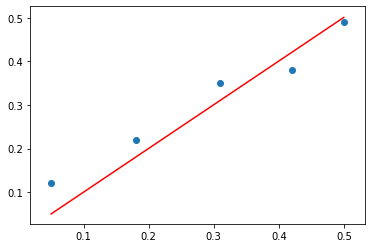

[1.00233226]


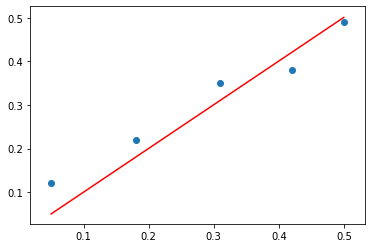

[1.00233226]


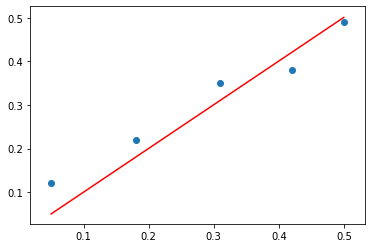

[1.00233226]


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


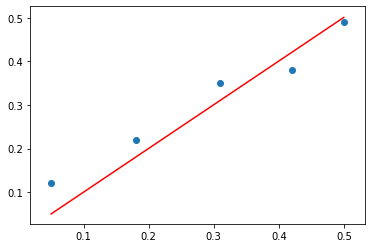

In [20]:
from numpy import array
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
print(data)

# linear regression dataset
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# direct solution to linear least squares
from numpy.linalg import inv
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# QR decomposition solution to linear least squares
from numpy.linalg import qr
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# SVD solution via pseudoinverse to linear least squares
from numpy.linalg import pinv
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# least squares via convenience function
from numpy.linalg import lstsq
# calculate coefficients
b, residuals, rank, s = lstsq(X, y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()